In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Input
from tensorflow.keras.models import Sequential, Model
from keras.layers.core import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from keras.layers import ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path='./drive/MyDrive/Pneumonia/train/'
test_path='./drive/MyDrive/Pneumonia/test/'

In [ ]:
batch = 64
epochs_ = 10

In [ ]:
def Data(shape_):    
    train_normal = len(os.listdir(train_path+'NORMAL'))
    train_bacterial = len(os.listdir(train_path+'BACTERIAL PNEUMONIA'))
    train_viral = len(os.listdir(train_path+'VIRAL PNEUMONIA'))
    
    test_normal = len(os.listdir(test_path+'NORMAL'))
    test_bacterial = len(os.listdir(test_path+'BACTERIAL PNEUMONIA'))
    test_viral = len(os.listdir(test_path+'VIRAL PNEUMONIA'))

    train = [train_normal,train_bacterial,train_viral]
    test = [test_normal,test_bacterial,test_viral]

    df = pd.DataFrame(list(zip(train, test)), index =['Normal', 'Bakteriyel', 'Viral'], columns=['Train', 'Test'])
    print(df)
    df.plot(kind='bar')
    plt.show()
    
    train_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.10)
    test_data_generator = ImageDataGenerator(rescale=1./255)

    train_data = train_data_generator.flow_from_directory(train_path, target_size=shape_, class_mode="categorical", batch_size = batch, subset="training")
    val_data = train_data_generator.flow_from_directory(train_path, target_size=shape_, class_mode="categorical", batch_size = batch, subset="validation")
    test_data = test_data_generator.flow_from_directory(test_path, target_size=shape_, shuffle=False, class_mode="categorical", batch_size = 1)

    return [train_data, val_data, test_data]

In [ ]:
def Grafik(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])   
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='lower right')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

In [ ]:
def KendiModelim():
    dataset = Data((230,230))
    train_data = dataset[0]
    val_data = dataset[1]
    test_data = dataset[2]

    model = Sequential()
    model.add(Conv2D(64, kernel_size=(2,2), padding = "same", activation="relu", input_shape=(230,230,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(96, kernel_size=(2,2), padding = "same", activation="relu"))
    model.add(Conv2D(128, kernel_size=(2,2), padding = "same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256, kernel_size=(3,3), padding = "same", activation="relu"))
    model.add(Conv2D(256, kernel_size=(2,2), padding = "same", activation="relu"))
    model.add(Conv2D(256, kernel_size=(3,3), padding = "same", activation="relu"))
    model.add(Conv2D(256, kernel_size=(3,3), padding = "same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, kernel_size=(3,3), padding = "same", activation="relu"))
    model.add(Conv2D(96, kernel_size=(3,3), padding = "same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.1))
    model.add(Dense(96, activation="relu"))
    model.add(Dense(3, activation="softmax"))
    
    model.summary()
    
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(train_data, steps_per_epoch=train_data.samples//batch, validation_data=val_data, epochs=epochs_, validation_steps=val_data.samples//batch)
    
    loss, accuracy = model.evaluate(test_data)
    print("\n", loss, accuracy)
    
    y_true = test_data.classes

    pred = model.predict_classes(test_data).astype(dtype = "int32")
    
    sns.heatmap(confusion_matrix(y_true, pred), annot= True, fmt='g')
    plt.show()
    
    print("\n", classification_report(y_true, pred))
    
    Grafik(history)

In [ ]:
def AlexNet():
    dataset = Data((227,227))
    train_data = dataset[0]
    val_data = dataset[1]
    test_data = dataset[2]
    
    alexnet=Sequential()
    alexnet.add(Conv2D(96,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(227,227,3)))
    alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    alexnet.add(ZeroPadding2D((2,2)))
    alexnet.add(Conv2D(256,kernel_size=(5,5),activation='relu',strides=(1,1)))
    alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    alexnet.add(ZeroPadding2D((1,1)))
    alexnet.add(Conv2D(384,kernel_size=(3,3),activation='relu',strides=(1,1)))
    alexnet.add(ZeroPadding2D((1,1)))
    alexnet.add(Conv2D(384,kernel_size=(3,3),activation='relu',strides=(1,1)))
    alexnet.add(ZeroPadding2D((1,1)))
    alexnet.add(Conv2D(256,kernel_size=(3,3),activation='relu',strides=(1,1)))
    alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    alexnet.add(Flatten())
    alexnet.add(Dense(4096,activation='relu'))
    alexnet.add(Dense(4096,activation='relu'))
    alexnet.add(Dense(3,activation='softmax'))
    alexnet.summary()

    alexnet.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
    
    history=alexnet.fit(train_data, steps_per_epoch=train_data.samples//batch, validation_data=val_data, epochs=epochs_, validation_steps=val_data.samples//batch)
    
    loss, accuracy = alexnet.evaluate(test_data)
    print("\n", loss, accuracy)
    
    y_true = test_data.classes
    pred = alexnet.predict_classes(test_data).astype(dtype = "int32")
    
    sns.heatmap(confusion_matrix(y_true, pred), annot= True, fmt='g')
    plt.show()
    
    print("\n", classification_report(y_true, pred))
    
    Grafik(history)

In [ ]:
def vgg_16():
    dataset = Data((224,224))
    train_data = dataset[0]
    val_data = dataset[1]
    test_data = dataset[2]

    model=Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(Conv2D(64, kernel_size=(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(128, kernel_size=(3,3),padding='same',activation='relu'))
    model.add(Conv2D(128, kernel_size=(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(256, kernel_size=(3,3),padding='same',activation='relu'))
    model.add(Conv2D(256, kernel_size=(3,3),padding='same',activation='relu'))
    model.add(Conv2D(256, kernel_size=(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(512, kernel_size=(3,3),padding='same',activation='relu'))
    model.add(Conv2D(512, kernel_size=(3,3),padding='same',activation='relu'))
    model.add(Conv2D(512, kernel_size=(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(512, kernel_size=(3,3),padding='same',activation='relu'))
    model.add(Conv2D(512, kernel_size=(3,3),padding='same',activation='relu'))
    model.add(Conv2D(512, kernel_size=(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dense(4096,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    model.summary()

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(train_data, steps_per_epoch=train_data.samples//batch, validation_data=val_data, epochs=epochs_, validation_steps=val_data.samples//batch)
    
    loss, accuracy = model.evaluate(test_data)
    print("\n", loss, accuracy)
    
    y_true = test_data.classes
    
    pred = model.predict(test_data)
    classes = np.argmax(pred, axis=-1)
    
    sns.heatmap(confusion_matrix(y_true, classes), annot= True, fmt='g')
    plt.show()
    
    print("\n", classification_report(y_true, classes))
    
    Grafik(history)

In [ ]:
def resnet50():
    dataset = Data((224,224))
    train_data = dataset[0]
    val_data = dataset[1]
    test_data = dataset[2]

    import tensorflow as tf
    resnet = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in resnet.layers:
        layer.trainable = False

    x = resnet.output
    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    x = Dropout(0.1)(x)
    x = Dense(units=128, activation='relu')(x)
    output = Dense(units=3, activation='softmax')(x)

    model = Model(resnet.inputs, output)

    model.summary()

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(train_data, steps_per_epoch=train_data.samples//batch, validation_data=val_data, epochs=epochs_, validation_steps=val_data.samples//batch)

    loss, accuracy = model.evaluate(test_data)
    print("\n", loss, accuracy)

    y_true = test_data.classes
    pred = model.predict(test_data)

    classes = np.argmax(pred,axis=1)

    sns.heatmap(confusion_matrix(y_true, classes), annot= True, fmt='g')
    plt.show()

    print("\n", classification_report(y_true, classes))

    Grafik(history)

            Train  Test
Normal       1349   234
Bakteriyel   2138   242
Viral        1344   148


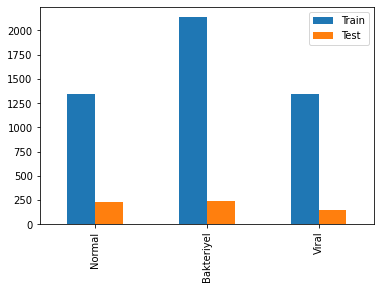

Found 4350 images belonging to 3 classes.
Found 481 images belonging to 3 classes.
Found 624 images belonging to 3 classes.
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_153 (Conv2D)          (None, 230, 230, 64)      832       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 115, 115, 64)      0         
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 115, 115, 96)      24672     
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 115, 115, 128)     49280     
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 57, 57, 128)       0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 57, 57, 256)       295168

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


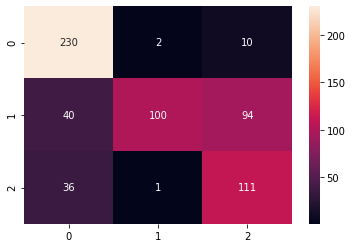


               precision    recall  f1-score   support

           0       0.75      0.95      0.84       242
           1       0.97      0.43      0.59       234
           2       0.52      0.75      0.61       148

    accuracy                           0.71       624
   macro avg       0.75      0.71      0.68       624
weighted avg       0.78      0.71      0.69       624



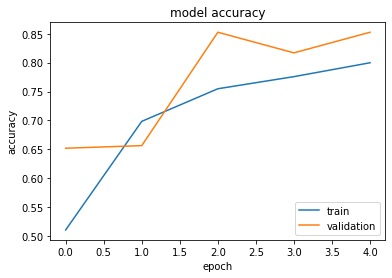

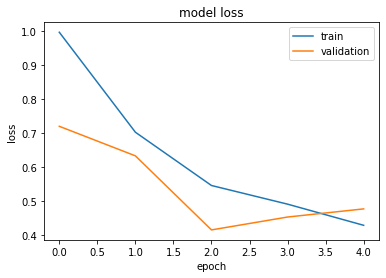

In [ ]:
KendiModelim()

            Train  Test
Normal       1349   234
Bakteriyel   2138   242
Viral        1344   148


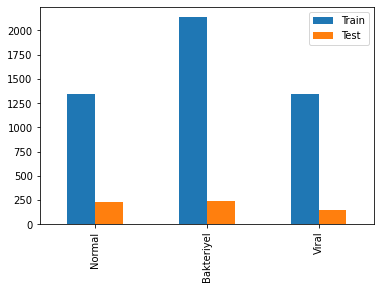

Found 4350 images belonging to 3 classes.
Found 481 images belonging to 3 classes.
Found 624 images belonging to 3 classes.
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
zero_padding2d_12 (ZeroPaddi (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
zero_padding2d_13 (ZeroPaddi (None, 15, 15, 256)       0      

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


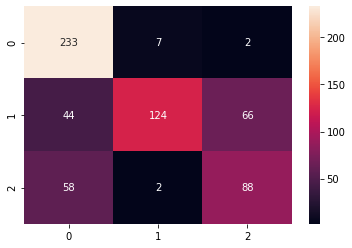


               precision    recall  f1-score   support

           0       0.70      0.96      0.81       242
           1       0.93      0.53      0.68       234
           2       0.56      0.59      0.58       148

    accuracy                           0.71       624
   macro avg       0.73      0.70      0.69       624
weighted avg       0.75      0.71      0.70       624



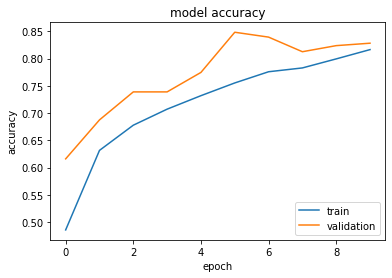

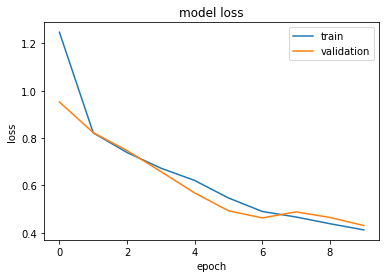

In [ ]:
AlexNet()

            Train  Test
Normal       1349   234
Bakteriyel   2138   242
Viral        1344   148


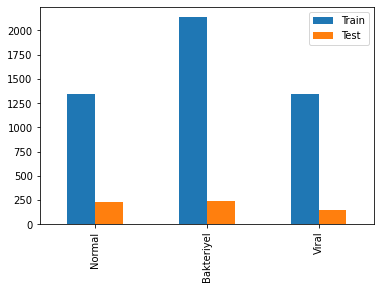

Found 4350 images belonging to 3 classes.
Found 481 images belonging to 3 classes.
Found 624 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 56, 56, 128)       0        

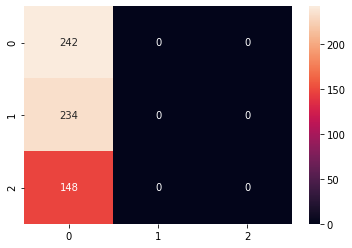


               precision    recall  f1-score   support

           0       0.39      1.00      0.56       242
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00       148

    accuracy                           0.39       624
   macro avg       0.13      0.33      0.19       624
weighted avg       0.15      0.39      0.22       624



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


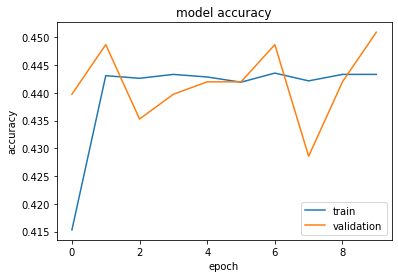

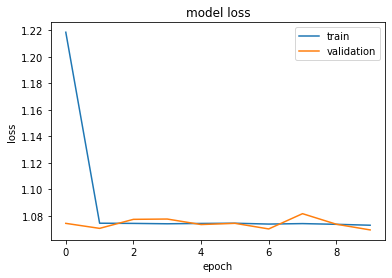

In [ ]:
vgg_16()

            Train  Test
Normal       1349   234
Bakteriyel   2138   242
Viral        1344   148


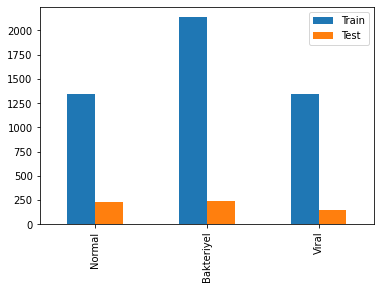

Found 4350 images belonging to 3 classes.
Found 481 images belonging to 3 classes.
Found 624 images belonging to 3 classes.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         co

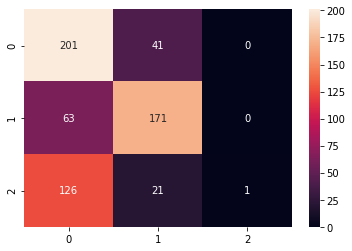


               precision    recall  f1-score   support

           0       0.52      0.83      0.64       242
           1       0.73      0.73      0.73       234
           2       1.00      0.01      0.01       148

    accuracy                           0.60       624
   macro avg       0.75      0.52      0.46       624
weighted avg       0.71      0.60      0.52       624



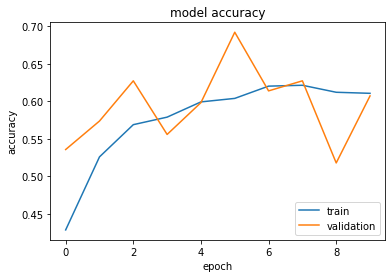

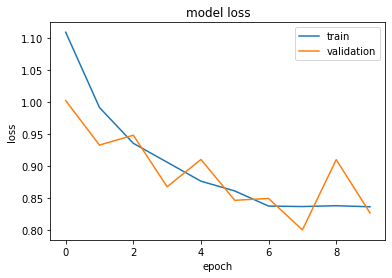

In [ ]:
resnet50()